# Temporal-Difference Methods

In this notebook, you will write your own implementations of many Temporal-Difference (TD) methods.

While we have provided some starter code, you are welcome to erase these hints and write your code from scratch.

---

### Part 0: Explore CliffWalkingEnv

We begin by importing the necessary packages.

In [1]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline

import check_test
from plot_utils import plot_values

Use the code cell below to create an instance of the [CliffWalking](https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py) environment.

In [2]:
env = gym.make('CliffWalking-v0')

The agent moves through a $4\times 12$ gridworld, with states numbered as follows:
```
[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
```
At the start of any episode, state `36` is the initial state.  State `47` is the only terminal state, and the cliff corresponds to states `37` through `46`.

The agent has 4 potential actions:
```
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
```

Thus, $\mathcal{S}^+=\{0, 1, \ldots, 47\}$, and $\mathcal{A} =\{0, 1, 2, 3\}$.  Verify this by running the code cell below.

In [3]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


In this mini-project, we will build towards finding the optimal policy for the CliffWalking environment.  The optimal state-value function is visualized below.  Please take the time now to make sure that you understand _why_ this is the optimal state-value function.

_**Note**: You can safely ignore the values of the cliff "states" as these are not true states from which the agent can make decisions.  For the cliff "states", the state-value function is not well-defined._

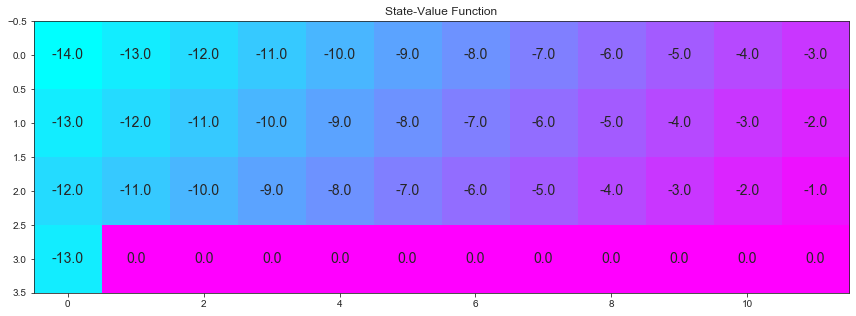

In [4]:
# define the optimal state-value function
V_opt = np.zeros((4,12))
V_opt[0:13][0] = -np.arange(3, 15)[::-1]
V_opt[0:13][1] = -np.arange(3, 15)[::-1] + 1
V_opt[0:13][2] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)

### Part 1: TD Control: Sarsa

In this section, you will write your own implementation of the Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [5]:
sys.path.append("..")
from RL_library.base_control import ControlProblem
from RL_library.monte_carlo_control import MonteCarlo
from RL_library.temporal_difference_control import TemporalDifferences

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.


Episode: 1000/5000, Epsilon: 0.001001001001001001
Policy:
------------
R | D | D | U | R | L | L | L | R | R | R | D | 
------------
R | R | R | L | D | R | R | R | R | R | D | D | 
------------
U | L | L | R | R | R | R | L | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


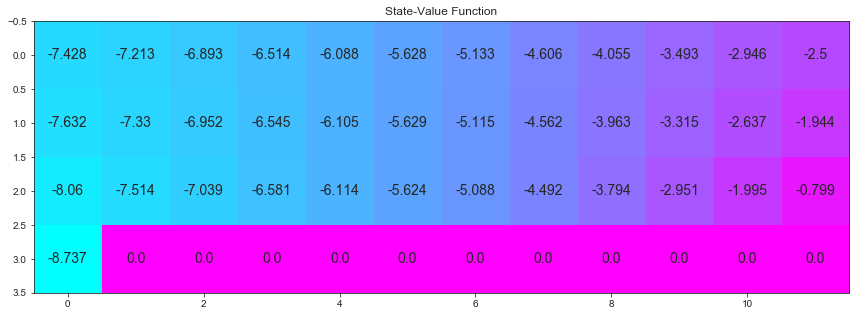


Episode: 2000/5000, Epsilon: 0.0005002501250625312
Policy:
------------
U | D | R | R | R | R | R | R | R | R | R | D | 
------------
L | U | R | R | R | R | U | R | R | D | D | D | 
------------
U | R | U | R | U | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


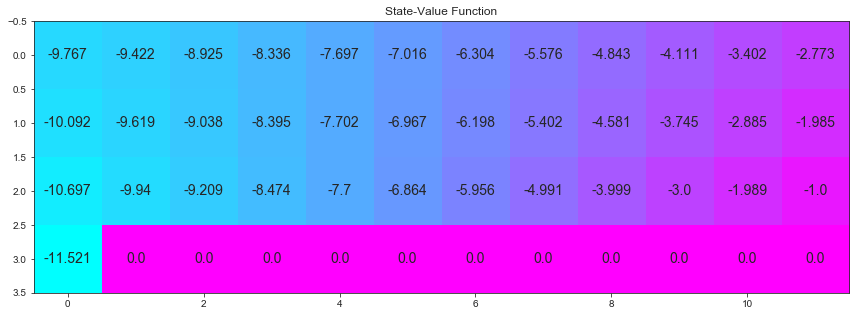


Episode: 3000/5000, Epsilon: 0.00033344448149383126
Policy:
------------
R | R | R | R | R | U | R | R | R | U | D | D | 
------------
R | R | R | R | R | R | U | R | R | R | R | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


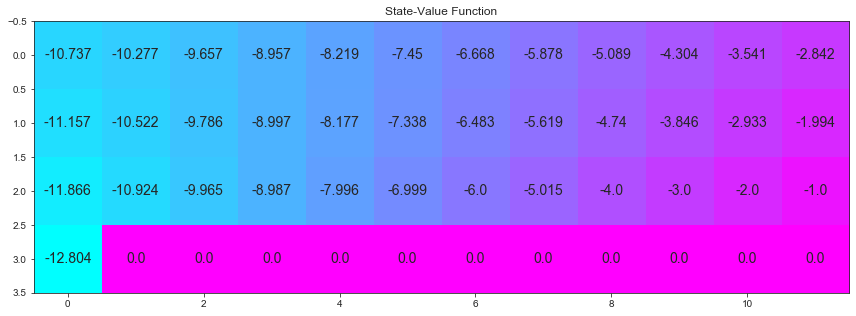


Episode: 4000/5000, Epsilon: 0.00025006251562890725
Policy:
------------
R | R | R | R | R | D | R | R | R | R | D | D | 
------------
U | D | D | R | R | R | R | R | R | D | D | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


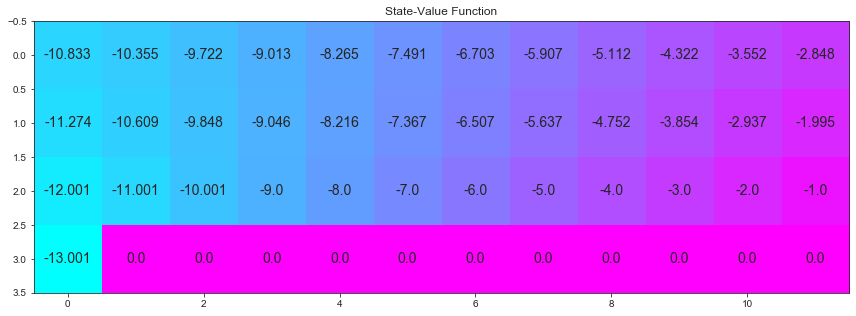


Episode: 5000/5000, Epsilon: 0.00020004000800160032
Policy:
------------
D | R | R | R | R | R | L | R | U | D | R | U | 
------------
R | R | R | R | R | R | R | D | R | D | R | D | 
------------
U | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


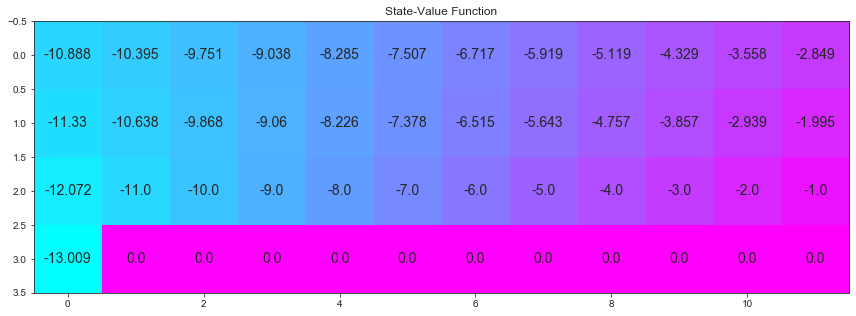


-33.5558


In [6]:
# obtain the estimated optimal policy and action-value function
policy, Q_sarsa, total_returns = ControlProblem(TemporalDifferences.sarsa0, plot_values=plot_values).run_control(env, 5000, 0.01)
print()
print(np.mean(total_returns))

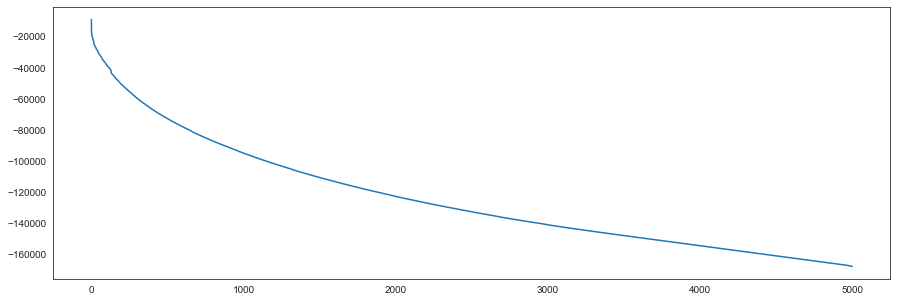

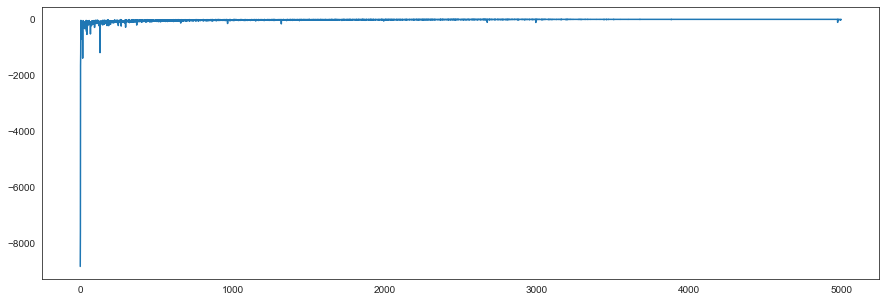

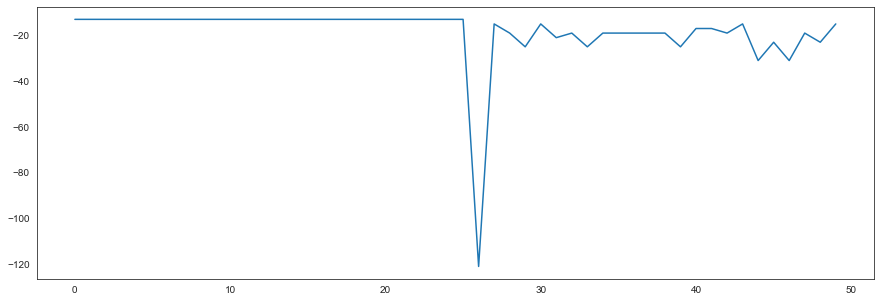

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(total_returns))
plt.show()
plt.figure(figsize=(15,5))
plt.plot(total_returns)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(total_returns[-50:])
plt.show()

**<span style="color: red;">PLEASE TRY AGAIN</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 2  1  1  1  1  1  3  1  0  2  1  0]
 [ 1  0  1  2  1  2  1  3  1  2  1  2]
 [ 0  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


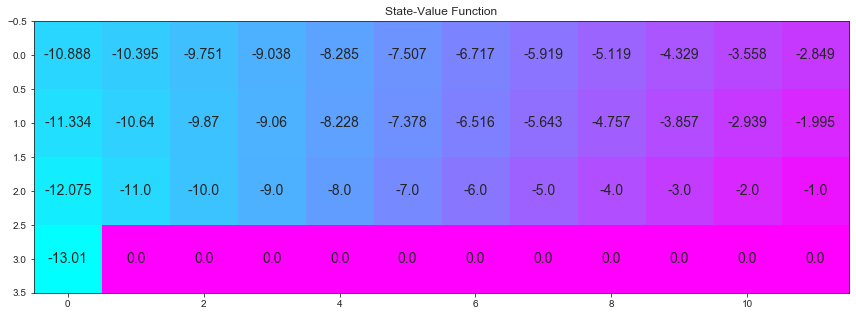

In [8]:
# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)

### Part 2: TD Control: Q-learning

In this section, you will write your own implementation of the Q-learning control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)


Episode: 1000/10000, Epsilon: 0.001001001001001001
Policy:
------------
L | U | L | L | U | D | D | D | U | D | R | D | 
------------
U | U | U | R | R | D | R | R | U | R | D | D | 
------------
R | U | L | L | L | U | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


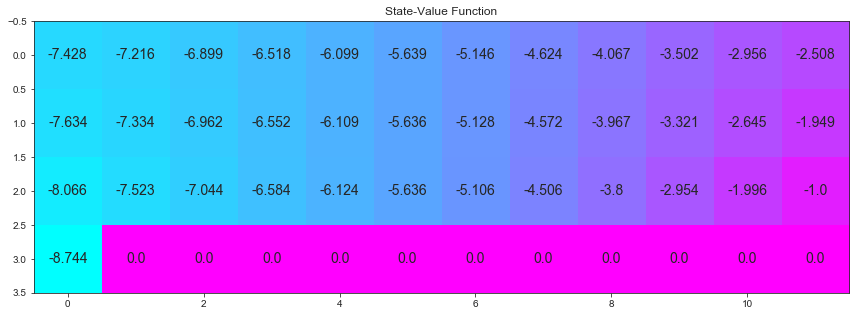


Episode: 2000/10000, Epsilon: 0.0005002501250625312
Policy:
------------
U | R | R | U | R | L | U | R | U | R | R | L | 
------------
U | L | D | R | R | U | R | R | R | R | D | D | 
------------
U | R | R | U | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


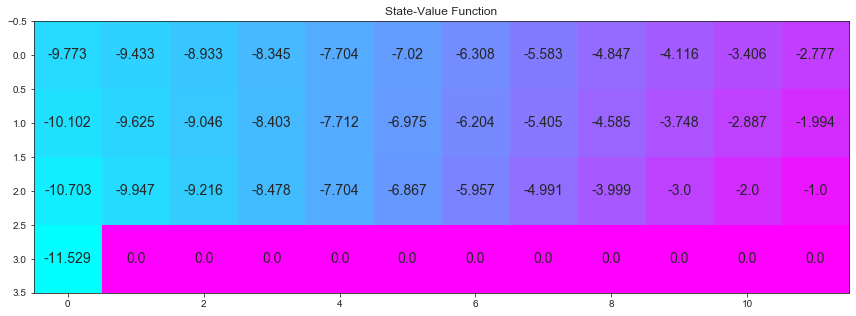


Episode: 3000/10000, Epsilon: 0.00033344448149383126
Policy:
------------
U | D | R | D | R | D | R | U | R | U | R | D | 
------------
L | R | R | D | R | R | R | U | L | R | D | D | 
------------
U | R | U | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


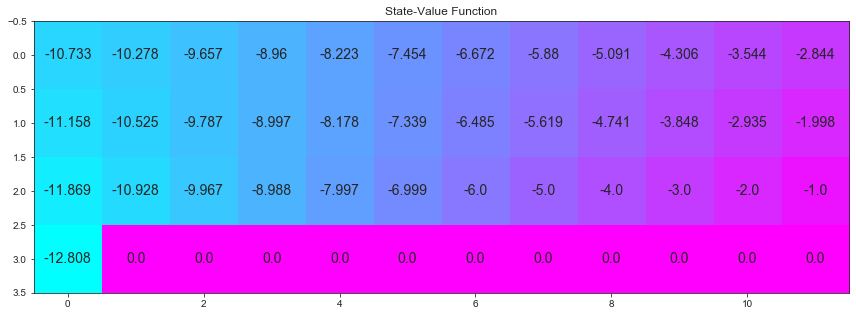


Episode: 4000/10000, Epsilon: 0.00025006251562890725
Policy:
------------
U | R | R | D | L | U | R | R | R | D | R | U | 
------------
R | R | L | R | D | R | R | R | D | D | D | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


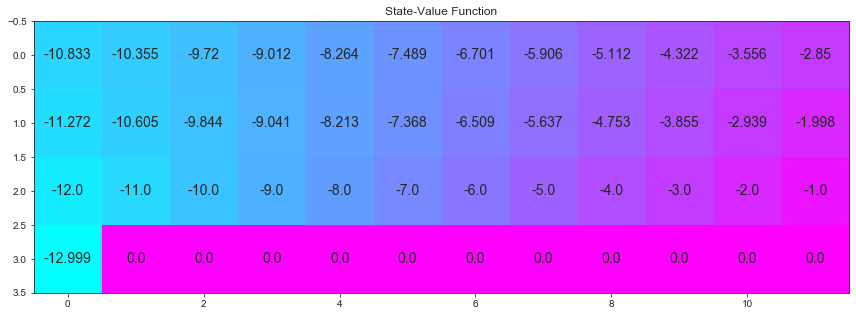


Episode: 5000/10000, Epsilon: 0.00020004000800160032
Policy:
------------
U | R | R | D | L | U | R | R | R | D | R | U | 
------------
R | R | L | R | D | R | R | R | D | D | D | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


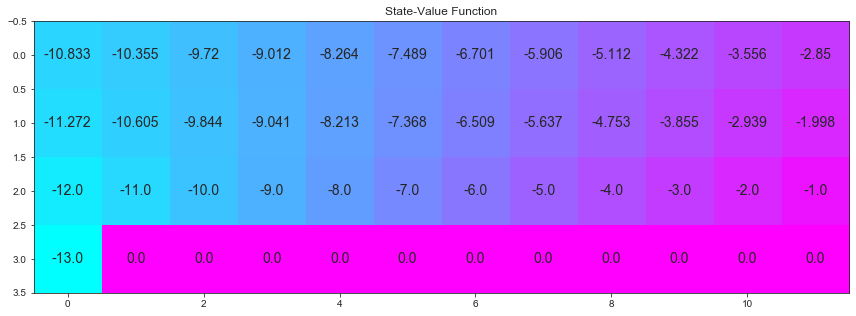


Episode: 6000/10000, Epsilon: 0.0001666944490748458
Policy:
------------
U | R | R | D | L | U | R | R | R | D | R | U | 
------------
R | R | L | R | D | R | R | R | D | D | D | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


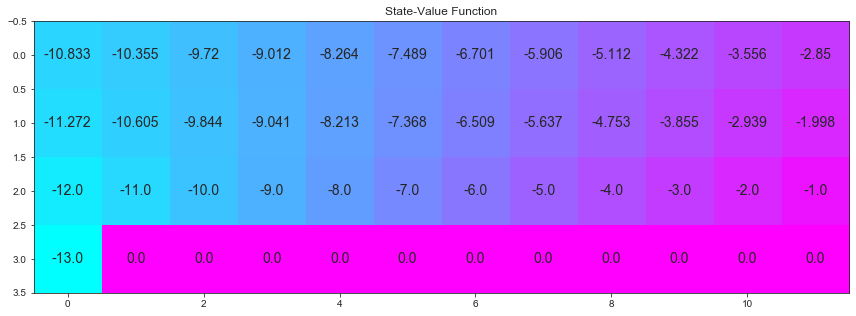


Episode: 7000/10000, Epsilon: 0.00014287755393627662
Policy:
------------
U | R | R | D | L | U | R | R | R | D | R | U | 
------------
R | R | L | R | D | R | R | R | D | D | D | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


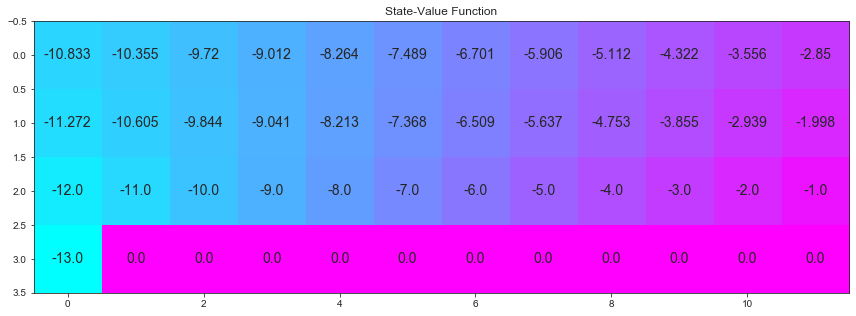


Episode: 8000/10000, Epsilon: 0.00012501562695336918
Policy:
------------
U | R | R | D | L | U | R | R | R | D | R | U | 
------------
R | R | L | R | D | R | R | R | D | D | D | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


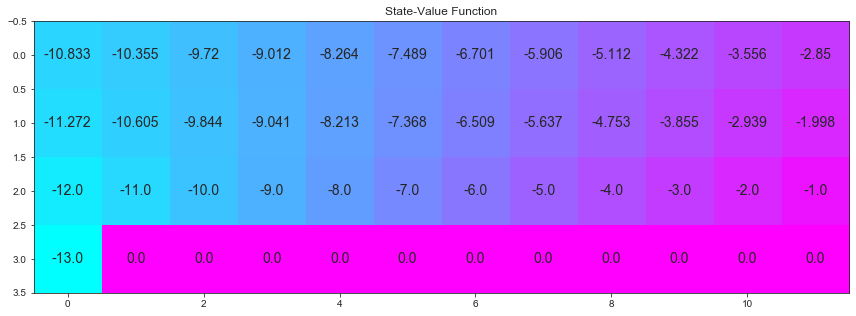


Episode: 9000/10000, Epsilon: 0.00011112345816201801
Policy:
------------
U | R | R | D | L | U | R | R | R | D | R | U | 
------------
R | R | L | R | D | R | R | R | D | D | D | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


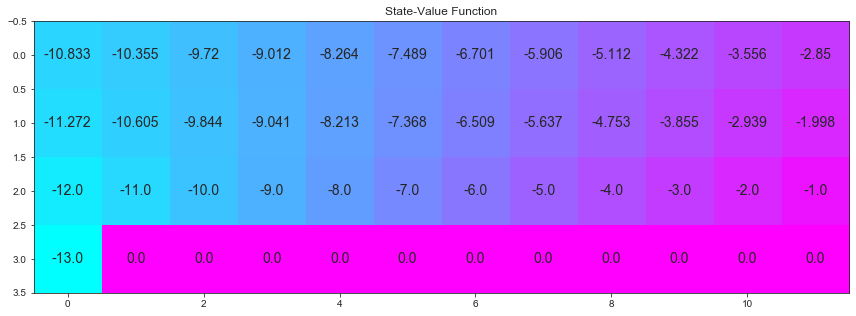


Episode: 10000/10000, Epsilon: 0.00010001000100010001
Policy:
------------
U | R | R | D | L | U | R | R | R | D | R | U | 
------------
R | R | L | R | D | R | R | R | D | D | D | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


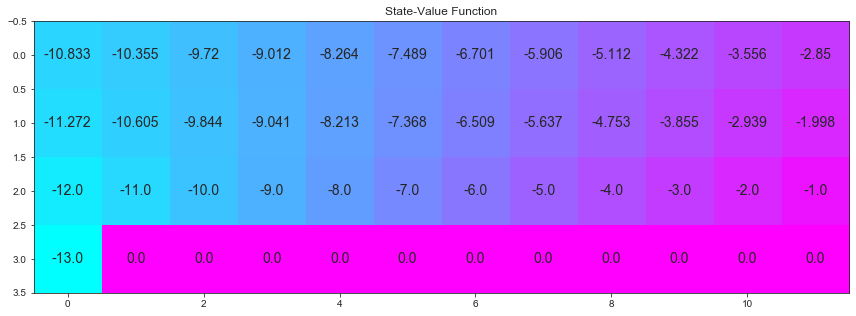


-24.2526


In [9]:
# obtain the estimated optimal policy and action-value function
policy, Q_sarsamax, total_returns = ControlProblem(TemporalDifferences.qlearning, plot_values=plot_values).run_control(env, 10000, 0.01)
print()
print(np.mean(total_returns))

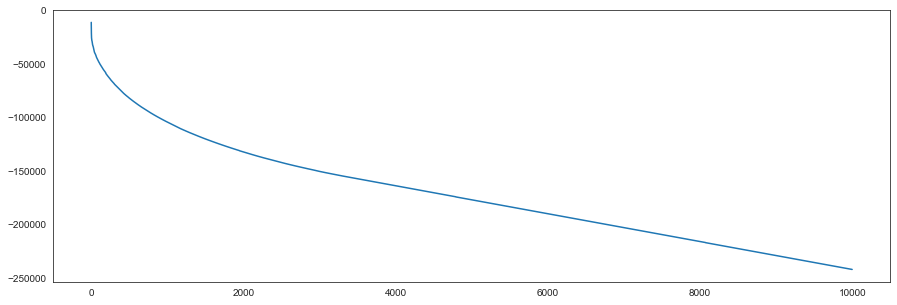

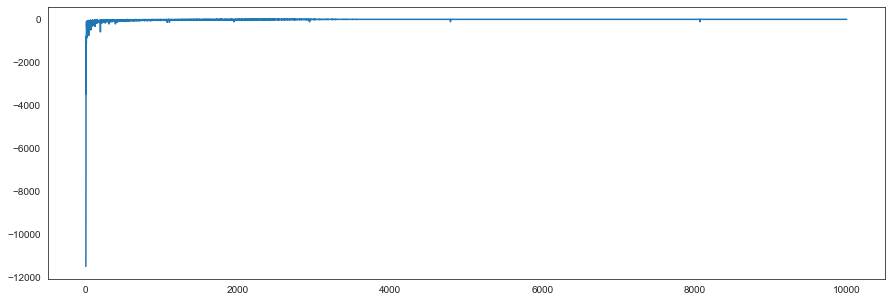

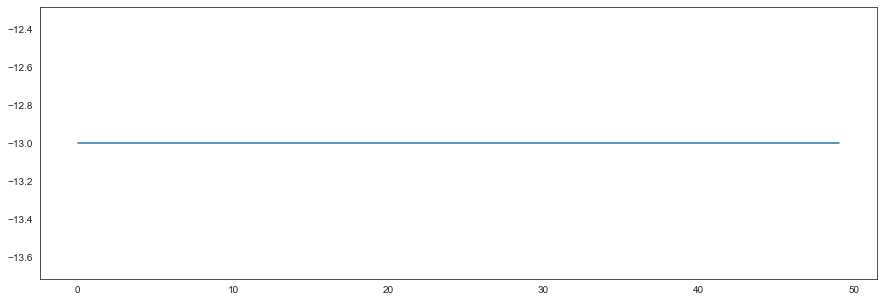

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(total_returns))
plt.show()
plt.figure(figsize=(15,5))
plt.plot(total_returns)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(total_returns[-50:])
plt.show()

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function. 

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 0  1  1  2  3  0  1  1  1  2  1  0]
 [ 1  1  3  1  2  1  1  1  2  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


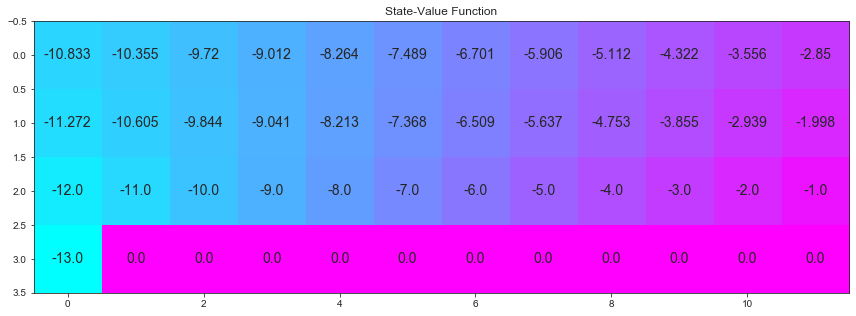

In [11]:
# print the estimated optimal policy
policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))
check_test.run_check('td_control_check', policy_sarsamax)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])

### Part 3: TD Control: Expected Sarsa

In this section, you will write your own implementation of the Expected Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.


Episode: 1000/10000, Epsilon: 0.001001001001001001
Policy:
------------
D | U | U | L | L | D | R | U | R | D | U | L | 
------------
U | U | U | R | R | U | L | R | U | L | R | U | 
------------
R | R | L | R | U | L | R | L | U | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


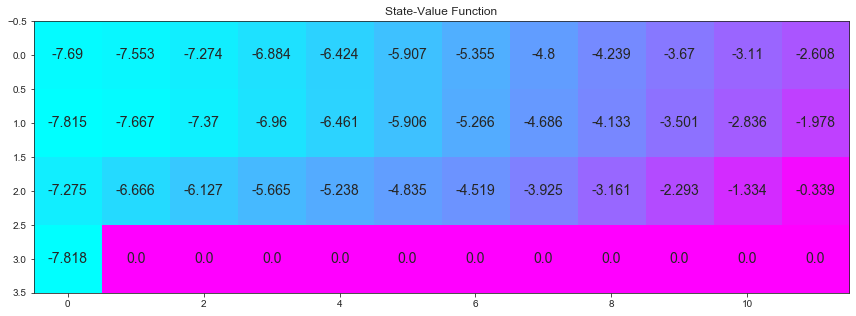


Episode: 2000/10000, Epsilon: 0.0005002501250625312
Policy:
------------
R | U | L | R | R | R | R | R | U | R | R | R | 
------------
L | L | R | R | D | R | D | R | R | U | R | D | 
------------
U | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


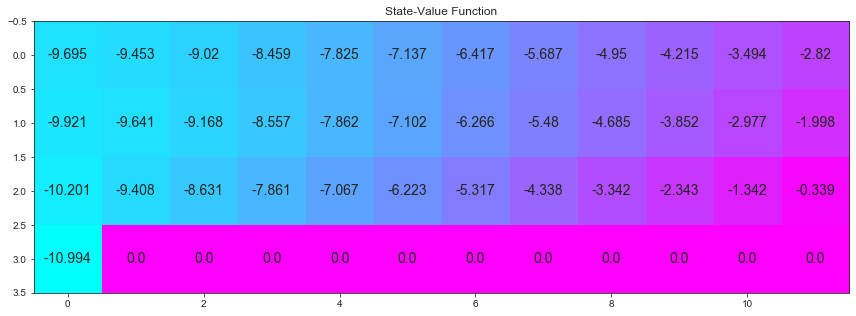


Episode: 3000/10000, Epsilon: 0.00033344448149383126
Policy:
------------
U | R | U | L | D | R | R | R | R | R | D | D | 
------------
U | R | R | R | R | R | D | R | R | D | R | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


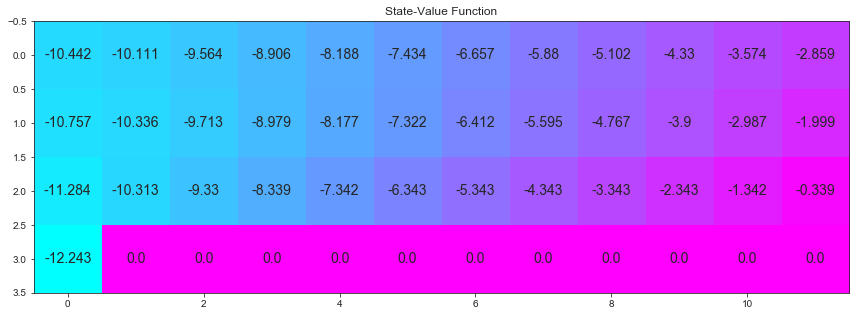


Episode: 4000/10000, Epsilon: 0.00025006251562890725
Policy:
------------
L | U | R | U | R | D | D | D | U | U | U | D | 
------------
L | R | U | R | R | L | L | R | R | L | R | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


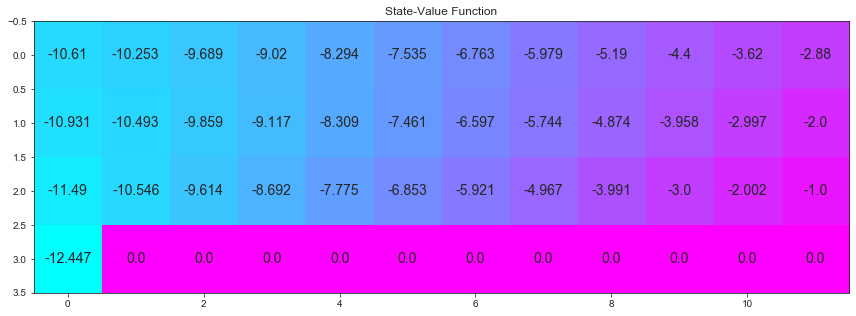


Episode: 5000/10000, Epsilon: 0.00020004000800160032
Policy:
------------
R | L | R | R | R | R | D | U | D | R | R | D | 
------------
L | R | R | R | R | R | R | D | R | R | R | D | 
------------
R | U | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


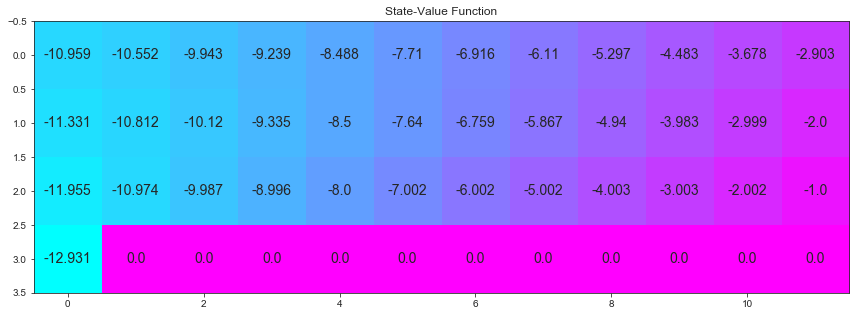


Episode: 6000/10000, Epsilon: 0.0001666944490748458
Policy:
------------
R | R | R | R | R | R | R | L | L | D | U | D | 
------------
U | R | R | R | R | R | R | R | R | R | R | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


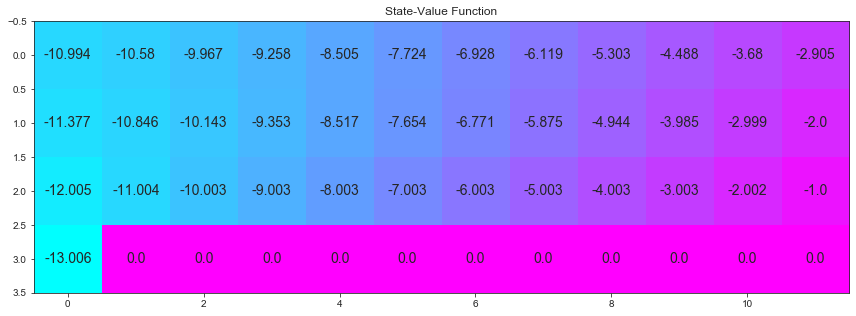


Episode: 7000/10000, Epsilon: 0.00014287755393627662
Policy:
------------
R | R | R | R | R | R | R | L | L | D | U | D | 
------------
U | R | R | R | R | R | R | R | R | R | R | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


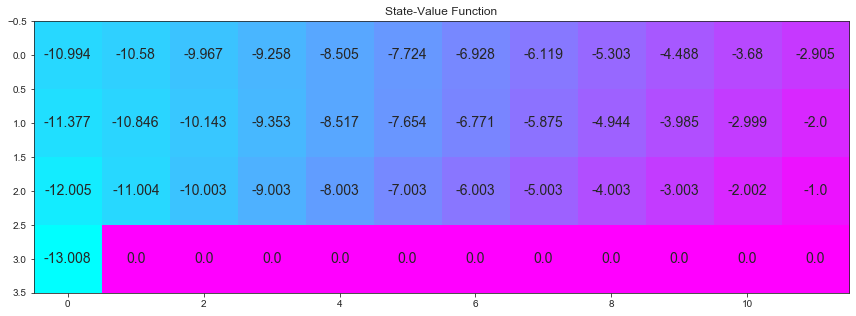


Episode: 8000/10000, Epsilon: 0.00012501562695336918
Policy:
------------
R | R | R | R | R | R | R | L | L | D | U | D | 
------------
U | R | R | R | R | R | R | R | R | R | R | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


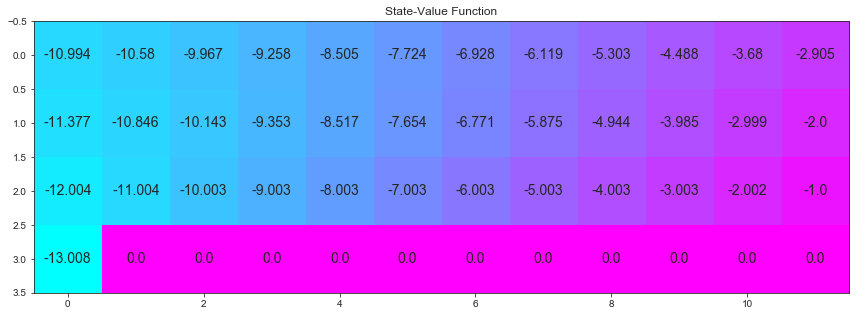


Episode: 9000/10000, Epsilon: 0.00011112345816201801
Policy:
------------
R | R | R | R | R | R | R | L | L | D | U | D | 
------------
U | R | R | R | R | R | R | R | R | R | R | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


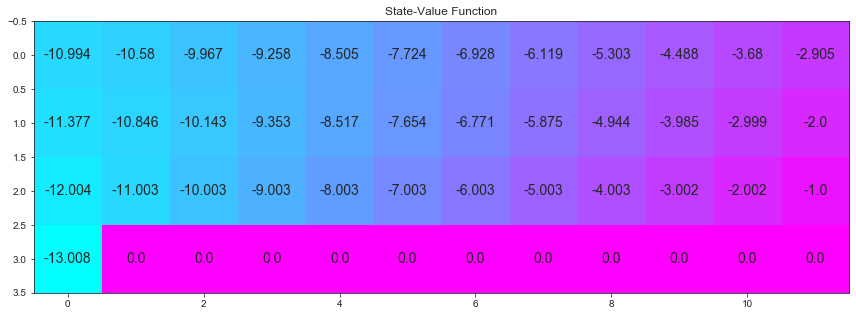


Episode: 10000/10000, Epsilon: 0.00010001000100010001
Policy:
------------
R | R | R | R | R | R | R | L | L | D | U | D | 
------------
U | R | R | R | R | R | R | R | R | R | R | D | 
------------
R | R | R | R | R | R | R | R | R | R | R | D | 
------------
U | U | U | U | U | U | U | U | U | U | U | U | 
------------


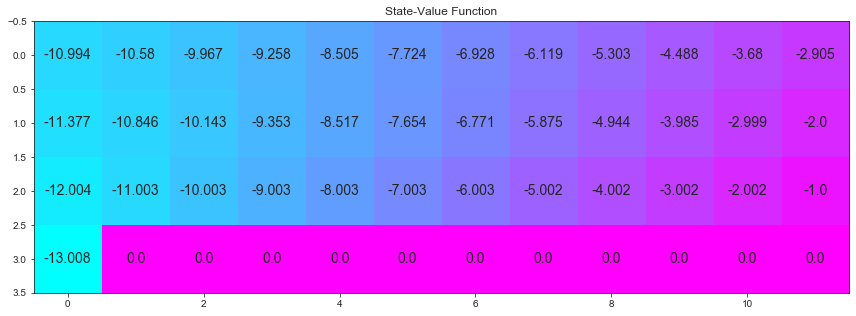


-22.8359


In [12]:
# obtain the estimated optimal policy and action-value function
policy, Q_expsarsa, total_returns = ControlProblem(TemporalDifferences.expected_sarsa, plot_values=plot_values).run_control(env, 10000, 0.01)
print()
print(np.mean(total_returns))

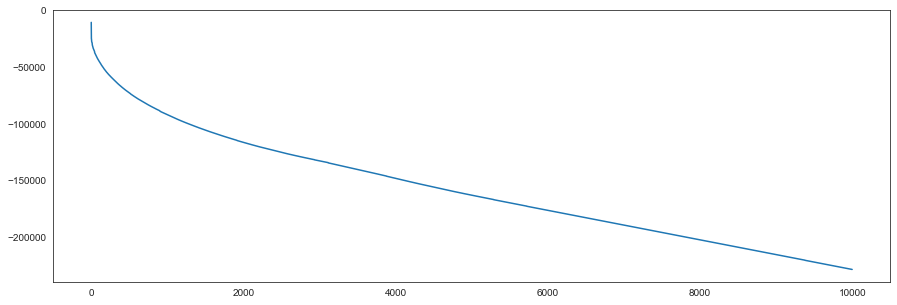

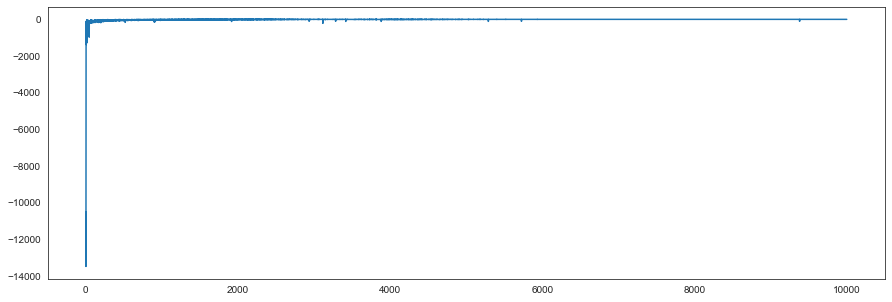

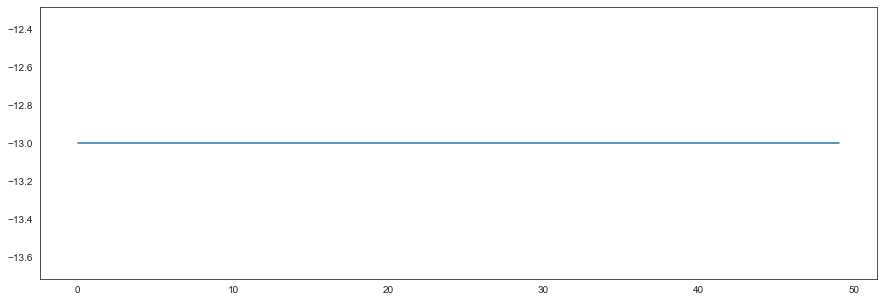

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(total_returns))
plt.show()
plt.figure(figsize=(15,5))
plt.plot(total_returns)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(total_returns[-50:])
plt.show()

**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  1  1  1  1  1  1  3  3  2  0  2]
 [ 0  1  1  1  1  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


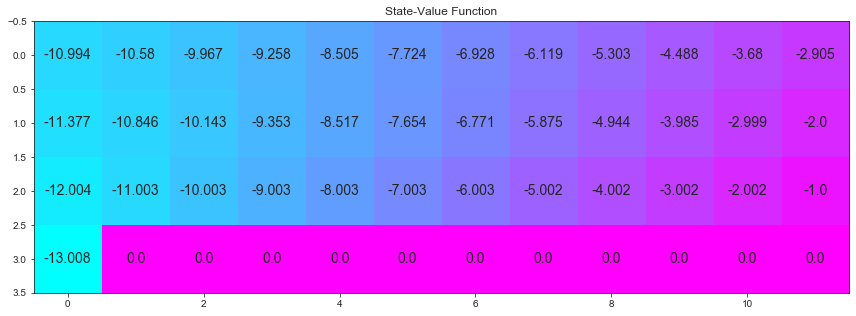

In [14]:
# obtain the estimated optimal policy and corresponding action-value function
#Q_expsarsa = expected_sarsa(env, 10000, 1)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])